MIT License

Copyright (c) Microsoft Corporation. All rights reserved.

This notebook is adapted from Francesca Lazzeri Energy Demand Forecast Workbench workshop.

Copyright (c) 2021 PyLadies Amsterdam, Alyona Galyeva

# Forecast output exploration

This notebook generates visual analyses of the generated forecast for a specified model.

In [1]:
%matplotlib inline
import os
import pickle
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
WORKDIR = os.getcwd()
TRAIN_DIR = os.path.join(WORKDIR, '../data-processing/data/train')
TEST_DIR = os.path.join(WORKDIR, '../data-processing/data/test')

In [3]:
# assign all the testing data into DFs
for test_data in os.listdir(TEST_DIR):
    locals()['df_' + test_data[5:-4]] = pd.read_csv(TEST_DIR + '/' + test_data)
    print(f'The local variable of type DataFrame, df_{test_data[5:-4]} is created')
# df_test_1.head()

The local variable of type DataFrame, df_test_4 is created
The local variable of type DataFrame, df_test_1 is created
The local variable of type DataFrame, df_test_2 is created
The local variable of type DataFrame, df_test_3 is created
The local variable of type DataFrame, df_outlier_test_4 is created
The local variable of type DataFrame, df_outlier_test_1 is created
The local variable of type DataFrame, df_outlier_test_3 is created
The local variable of type DataFrame, df_outlier_test_2 is created


In [4]:
import re
test_regex = re.compile(r'df_(\w+_)?test_\d')
df_test_list = list(filter(test_regex.match, locals().keys()))
df_test_list

['df_test_4',
 'df_test_1',
 'df_test_2',
 'df_test_3',
 'df_outlier_test_4',
 'df_outlier_test_1',
 'df_outlier_test_3',
 'df_outlier_test_2']

In [5]:
# set the y for every training data, by only selecting the 'load_actual_mw'
X_test_list = []
for test_df in df_test_list:
        #locals()[f'X_{test_df[3:]}'] = locals()[test_df].drop(['timestamp', 'load_actuals_mw'], axis = 1)
        locals()[f'X_{test_df[3:]}'] = locals()[test_df]
        X_test_list.append(f'X_{test_df[3:]}')
        print(f'The varaible, X_{test_df[3:]} is created.')

        locals()[f'y_{test_df[3:]}'] = locals()[test_df]['load_actuals_mw']
        print(f'The varaible, y_{test_df[3:]} is created.')

The varaible, X_test_4 is created.
The varaible, y_test_4 is created.
The varaible, X_test_1 is created.
The varaible, y_test_1 is created.
The varaible, X_test_2 is created.
The varaible, y_test_2 is created.
The varaible, X_test_3 is created.
The varaible, y_test_3 is created.
The varaible, X_outlier_test_4 is created.
The varaible, y_outlier_test_4 is created.
The varaible, X_outlier_test_1 is created.
The varaible, y_outlier_test_1 is created.
The varaible, X_outlier_test_3 is created.
The varaible, y_outlier_test_3 is created.
The varaible, X_outlier_test_2 is created.
The varaible, y_outlier_test_2 is created.


In [6]:
WORKDIR = os.getcwd()
LR_DIR = os.path.join(WORKDIR, '../data-modeling/Linear_models')
NB_DIR = os.path.join(WORKDIR, '../data-modeling/NaiveBayes_models')

In [7]:
with open(os.path.join(LR_DIR, 'lr_model_4.pkl'), 'rb') as f:
    lr_model_4 = pickle.load(f)
with open(os.path.join(LR_DIR, 'lr_model_3.pkl'), 'rb') as f:
    lr_model_3 = pickle.load(f)
with open(os.path.join(LR_DIR, 'lr_model_2.pkl'), 'rb') as f:
    lr_model_2 = pickle.load(f)
with open(os.path.join(LR_DIR, 'lr_model_1.pkl'), 'rb') as f:
    lr_model_1 = pickle.load(f)

In [8]:
with open(os.path.join(LR_DIR, 'lr_outliers_model_4.pkl'), 'rb') as f:
    lr_outliers_model_4 = pickle.load(f)
with open(os.path.join(LR_DIR, 'lr_outliers_model_3.pkl'), 'rb') as f:
    lr_outliers_model_3 = pickle.load(f)
with open(os.path.join(LR_DIR, 'lr_outliers_model_2.pkl'), 'rb') as f:
    lr_outliers_model_2 = pickle.load(f)
with open(os.path.join(LR_DIR, 'lr_outliers_model_1.pkl'), 'rb') as f:
    lr_outliers_model_1 = pickle.load(f)

In [9]:
with open(os.path.join(NB_DIR, 'NaiveBayes_model_4.pkl'), 'rb') as f:
    NaiveBayes_model_4 = pickle.load(f)
with open(os.path.join(NB_DIR, 'NaiveBayes_model_3.pkl'), 'rb') as f:
    NaiveBayes_model_3 = pickle.load(f)
with open(os.path.join(NB_DIR, 'NaiveBayes_model_2.pkl'), 'rb') as f:
    NaiveBayes_model_2 = pickle.load(f)
with open(os.path.join(NB_DIR, 'NaiveBayes_model_1.pkl'), 'rb') as f:
    NaiveBayes_model_1 = pickle.load(f)

In [10]:
with open(os.path.join(NB_DIR, 'NaiveBayes_outliers_model_4.pkl'), 'rb') as f:
    NaiveBayes_outliers_model_4 = pickle.load(f)
with open(os.path.join(NB_DIR, 'NaiveBayes_outliers_model_3.pkl'), 'rb') as f:
    NaiveBayes_outliers_model_3 = pickle.load(f)
with open(os.path.join(NB_DIR, 'NaiveBayes_outliers_model_2.pkl'), 'rb') as f:
    NaiveBayes_outliers_model_2 = pickle.load(f)
with open(os.path.join(NB_DIR, 'NaiveBayes_outliers_model_1.pkl'), 'rb') as f:
    NaiveBayes_outliers_model_1 = pickle.load(f)

In [11]:
# set forecast horizon
H = 6

def generate_forecasts(test_df, model):
    predictions_df = test_df.copy()
    X_test = test_df.copy().drop(['timestamp', 'load_actuals_mw'], axis=1)
    #X_test = test_df.copy()

    # Iterate over future time steps
    for n in range(1, H+1):
        predictions_df['pred_t+'+str(n)] = model.predict(X_test.values)

        # shift lagged load_actuals_mw features...
        shift_load_actuals_mw_features(X_test)

        # ...and replace load_actuals_mw_lag1 with latest prediction
        X_test['load_actuals_mw_lag1'] = predictions_df['pred_t+'+str(n)]

    return predictions_df

def shift_load_actuals_mw_features(df):
    for i in range(H, 1, -1):
        df['load_actuals_mw_lag'+str(i)] = df['load_actuals_mw_lag'+str(i-1)]


In [12]:
predictions_df_4 = generate_forecasts(df_test_4, lr_model_4)
predictions_df_3 = generate_forecasts(df_test_3, lr_model_3)
predictions_df_2 = generate_forecasts(df_test_2, lr_model_2)
predictions_df_1 = generate_forecasts(df_test_1, lr_model_1)

In [13]:
predictions_df_outliers_4 = generate_forecasts(df_outlier_test_4, lr_outliers_model_4)
predictions_df_outliers_3 = generate_forecasts(df_outlier_test_4, lr_outliers_model_3)
predictions_df_outliers_2 = generate_forecasts(df_outlier_test_4, lr_outliers_model_2)
predictions_df_outliers_1 = generate_forecasts(df_outlier_test_4, lr_outliers_model_1)

In [14]:
predictions_df_nb_4 = generate_forecasts(df_test_4, NaiveBayes_model_4)
predictions_df_nb_3 = generate_forecasts(df_test_3, NaiveBayes_model_3)
predictions_df_nb_2 = generate_forecasts(df_test_2, NaiveBayes_model_2)
predictions_df_nb_1 = generate_forecasts(df_test_1, NaiveBayes_model_1)

In [15]:
predictions_df_outliers_nb_4 = generate_forecasts(df_outlier_test_4, NaiveBayes_outliers_model_4)
predictions_df_outliers_nb_3 = generate_forecasts(df_outlier_test_4, NaiveBayes_outliers_model_3)
predictions_df_outliers_nb_2 = generate_forecasts(df_outlier_test_4, NaiveBayes_outliers_model_2)
predictions_df_outliers_nb_1 = generate_forecasts(df_outlier_test_4, NaiveBayes_outliers_model_1)

In [16]:
def evaluate_forecast(predictions_df, n):
    '''
    Compute forecast performance metrics for every n step ahead
    '''

    y_true = predictions_df['load_actuals_mw']
    y_pred = predictions_df['pred_t+'+str(n)]
    error = y_pred - y_true

    metrics = {}

    # forecast bias
    metrics['ME'] = error.mean()
    metrics['MPE'] = 100 * (error / y_true).mean()

    # forecast error
    # MSE = mean_squared_error(y_true, y_pred)
    metrics['MSE'] = (error**2).mean()
    metrics['RMSE'] = metrics['MSE']**0.5
    metrics['MAPE'] = 100 * (error.abs() / y_true).mean()
    metrics['sMAPE'] = 200 * (error.abs() / y_true).mean()

    # relative error
    naive_pred = predictions_df['load_actuals_mw_lag'+str(n)]
    naive_error = naive_pred - y_true
    RE = error / naive_error
    metrics['MAPE_base'] = 100 * (naive_error.abs() / y_true).mean()
    metrics['MdRAE'] = np.median(RE.abs())

    return metrics

In [17]:
# calculate model performance metrics
performance_metrics_4 = pd.DataFrame.from_dict({1: evaluate_forecast(predictions_df_4, 1),
                                                2: evaluate_forecast(predictions_df_4, 2),
                                                3: evaluate_forecast(predictions_df_4, 3),
                                                4: evaluate_forecast(predictions_df_4, 4),
                                                5: evaluate_forecast(predictions_df_4, 5),
                                                6: evaluate_forecast(predictions_df_4, 6)})
performance_metrics_3 = pd.DataFrame.from_dict({1: evaluate_forecast(predictions_df_3, 1),
                                                2: evaluate_forecast(predictions_df_3, 2),
                                                3: evaluate_forecast(predictions_df_3, 3),
                                                4: evaluate_forecast(predictions_df_3, 4),
                                                5: evaluate_forecast(predictions_df_3, 5),
                                                6: evaluate_forecast(predictions_df_3, 6)})
performance_metrics_2 = pd.DataFrame.from_dict({1: evaluate_forecast(predictions_df_2, 1),
                                                2: evaluate_forecast(predictions_df_2, 2),
                                                3: evaluate_forecast(predictions_df_2, 3),
                                                4: evaluate_forecast(predictions_df_2, 4),
                                                5: evaluate_forecast(predictions_df_2, 5),
                                                6: evaluate_forecast(predictions_df_2, 6)})
performance_metrics_1 = pd.DataFrame.from_dict({1: evaluate_forecast(predictions_df_1, 1),
                                                2: evaluate_forecast(predictions_df_1, 2),
                                                3: evaluate_forecast(predictions_df_1, 3),
                                                4: evaluate_forecast(predictions_df_1, 4),
                                                5: evaluate_forecast(predictions_df_1, 5),
                                                6: evaluate_forecast(predictions_df_1, 6)})

In [18]:
performance_metrics_outliers_4 = pd.DataFrame.from_dict({1: evaluate_forecast(predictions_df_outliers_4, 1),
                                                         2: evaluate_forecast(predictions_df_outliers_4, 2),
                                                         3: evaluate_forecast(predictions_df_outliers_4, 3),
                                                         4: evaluate_forecast(predictions_df_outliers_4, 4),
                                                         5: evaluate_forecast(predictions_df_outliers_4, 5),
                                                         6: evaluate_forecast(predictions_df_outliers_4, 6)})
performance_metrics_outliers_3 = pd.DataFrame.from_dict({1: evaluate_forecast(predictions_df_outliers_3, 1),
                                                         2: evaluate_forecast(predictions_df_outliers_3, 2),
                                                         3: evaluate_forecast(predictions_df_outliers_3, 3),
                                                         4: evaluate_forecast(predictions_df_outliers_3, 4),
                                                         5: evaluate_forecast(predictions_df_outliers_3, 5),
                                                         6: evaluate_forecast(predictions_df_outliers_3, 6)})
performance_metrics_outliers_2 = pd.DataFrame.from_dict({1: evaluate_forecast(predictions_df_outliers_2, 1),
                                                         2: evaluate_forecast(predictions_df_outliers_2, 2),
                                                         3: evaluate_forecast(predictions_df_outliers_2, 3),
                                                         4: evaluate_forecast(predictions_df_outliers_2, 4),
                                                         5: evaluate_forecast(predictions_df_outliers_2, 5),
                                                         6: evaluate_forecast(predictions_df_outliers_2, 6)})
performance_metrics_outliers_1 = pd.DataFrame.from_dict({1: evaluate_forecast(predictions_df_outliers_1, 1),
                                                         2: evaluate_forecast(predictions_df_outliers_1, 2),
                                                         3: evaluate_forecast(predictions_df_outliers_1, 3),
                                                         4: evaluate_forecast(predictions_df_outliers_1, 4),
                                                         5: evaluate_forecast(predictions_df_outliers_1, 5),
                                                         6: evaluate_forecast(predictions_df_outliers_1, 6)})

In [19]:
performance_metrics_nb_4 = pd.DataFrame.from_dict({1: evaluate_forecast(predictions_df_nb_4, 1),
                                                   2: evaluate_forecast(predictions_df_nb_4, 2),
                                                   3: evaluate_forecast(predictions_df_nb_4, 3),
                                                   4: evaluate_forecast(predictions_df_nb_4, 4),
                                                   5: evaluate_forecast(predictions_df_nb_4, 5),
                                                   6: evaluate_forecast(predictions_df_nb_4, 6)})
performance_metrics_nb_3 = pd.DataFrame.from_dict({1: evaluate_forecast(predictions_df_nb_3, 1),
                                                   2: evaluate_forecast(predictions_df_nb_3, 2),
                                                   3: evaluate_forecast(predictions_df_nb_3, 3),
                                                   4: evaluate_forecast(predictions_df_nb_3, 4),
                                                   5: evaluate_forecast(predictions_df_nb_3, 5),
                                                   6: evaluate_forecast(predictions_df_nb_3, 6)})
performance_metrics_nb_2 = pd.DataFrame.from_dict({1: evaluate_forecast(predictions_df_nb_2, 1),
                                                   2: evaluate_forecast(predictions_df_nb_2, 2),
                                                   3: evaluate_forecast(predictions_df_nb_2, 3),
                                                   4: evaluate_forecast(predictions_df_nb_2, 4),
                                                   5: evaluate_forecast(predictions_df_nb_2, 5),
                                                   6: evaluate_forecast(predictions_df_nb_2, 6)})
performance_metrics_nb_1 = pd.DataFrame.from_dict({1: evaluate_forecast(predictions_df_nb_1, 1),
                                                   2: evaluate_forecast(predictions_df_nb_1, 2),
                                                   3: evaluate_forecast(predictions_df_nb_1, 3),
                                                   4: evaluate_forecast(predictions_df_nb_1, 4),
                                                   5: evaluate_forecast(predictions_df_nb_1, 5),
                                                   6: evaluate_forecast(predictions_df_nb_1, 6)})

In [20]:
performance_metrics_outliers_nb_4 = pd.DataFrame.from_dict({1: evaluate_forecast(predictions_df_outliers_nb_4, 1),
                                                            2: evaluate_forecast(predictions_df_outliers_nb_4, 2),
                                                            3: evaluate_forecast(predictions_df_outliers_nb_4, 3),
                                                            4: evaluate_forecast(predictions_df_outliers_nb_4, 4),
                                                            5: evaluate_forecast(predictions_df_outliers_nb_4, 5),
                                                            6: evaluate_forecast(predictions_df_outliers_nb_4, 6)})
performance_metrics_outliers_nb_3 = pd.DataFrame.from_dict({1: evaluate_forecast(predictions_df_outliers_nb_3, 1),
                                                            2: evaluate_forecast(predictions_df_outliers_nb_3, 2),
                                                            3: evaluate_forecast(predictions_df_outliers_nb_3, 3),
                                                            4: evaluate_forecast(predictions_df_outliers_nb_3, 4),
                                                            5: evaluate_forecast(predictions_df_outliers_nb_3, 5),
                                                            6: evaluate_forecast(predictions_df_outliers_nb_3, 6)})
performance_metrics_outliers_nb_2 = pd.DataFrame.from_dict({1: evaluate_forecast(predictions_df_outliers_nb_2, 1),
                                                            2: evaluate_forecast(predictions_df_outliers_nb_2, 2),
                                                            3: evaluate_forecast(predictions_df_outliers_nb_2, 3),
                                                            4: evaluate_forecast(predictions_df_outliers_nb_2, 4),
                                                            5: evaluate_forecast(predictions_df_outliers_nb_2, 5),
                                                            6: evaluate_forecast(predictions_df_outliers_nb_2, 6)})
performance_metrics_outliers_nb_1 = pd.DataFrame.from_dict({1: evaluate_forecast(predictions_df_outliers_nb_1, 1),
                                                            2: evaluate_forecast(predictions_df_outliers_nb_1, 2),
                                                            3: evaluate_forecast(predictions_df_outliers_nb_1, 3),
                                                            4: evaluate_forecast(predictions_df_outliers_nb_1, 4),
                                                            5: evaluate_forecast(predictions_df_outliers_nb_1, 5),
                                                            6: evaluate_forecast(predictions_df_outliers_nb_1, 6)})

In [21]:
# Compute and log average of metrics over the forecast horizon
horizon_mean_4 = performance_metrics_4.mean(axis=1)
horizon_mean_3 = performance_metrics_3.mean(axis=1)
horizon_mean_2 = performance_metrics_2.mean(axis=1)
horizon_mean_1 = performance_metrics_1.mean(axis=1)
horizon_mean_outliers_4 = performance_metrics_outliers_4.mean(axis=1)
horizon_mean_outliers_3 = performance_metrics_outliers_3.mean(axis=1)
horizon_mean_outliers_2 = performance_metrics_outliers_2.mean(axis=1)
horizon_mean_outliers_1 = performance_metrics_outliers_1.mean(axis=1)

In [22]:
horizon_mean_df = pd.DataFrame({'horizon_mean_4': horizon_mean_4,
                                'horizon_mean_3': horizon_mean_3,
                                'horizon_mean_2': horizon_mean_2,
                                'horizon_mean_1': horizon_mean_1,
                                'horizon_mean_outliers_4': horizon_mean_outliers_4,
                                'horizon_mean_outliers_3': horizon_mean_outliers_3,
                                'horizon_mean_outliers_2': horizon_mean_outliers_2,
                                'horizon_mean_outliers_1': horizon_mean_outliers_1})
horizon_mean_df

,horizon_mean_4,horizon_mean_3,horizon_mean_2,horizon_mean_1,horizon_mean_outliers_4,horizon_mean_outliers_3,horizon_mean_outliers_2,horizon_mean_outliers_1
ME,-0.820935,-0.139216,-0.840677,0.140312,-0.814035,-0.854619,-0.875489,-0.226819
MPE,-0.778600,-0.029394,-0.769962,0.199870,NaN,NaN,NaN,inf
MSE,5.621916,5.788398,6.441315,1.550707,9.854934,9.654539,9.268358,4.119870
RMSE,2.191628,2.263673,2.388454,1.241921,3.015464,2.987280,2.935270,2.028659
MAPE,1.706906,1.627943,1.858218,1.059333,inf,inf,inf,inf
sMAPE,3.413813,3.255886,3.716436,2.118666,inf,inf,inf,inf
MAPE_base,2.595183,2.832243,3.036425,2.577134,inf,inf,inf,inf
MdRAE,0.672129,0.597161,0.657773,0.491459,0.672801,0.672033,0.666478,0.491765


In [23]:
horizon_mean_nb_4 = performance_metrics_nb_4.mean(axis=1)
horizon_mean_nb_3 = performance_metrics_nb_3.mean(axis=1)
horizon_mean_nb_2 = performance_metrics_nb_2.mean(axis=1)
horizon_mean_nb_1 = performance_metrics_nb_1.mean(axis=1)
horizon_mean_outliers_nb_4 = performance_metrics_outliers_nb_4.mean(axis=1)
horizon_mean_outliers_nb_3 = performance_metrics_outliers_nb_3.mean(axis=1)
horizon_mean_outliers_nb_2 = performance_metrics_outliers_nb_2.mean(axis=1)
horizon_mean_outliers_nb_1 = performance_metrics_outliers_nb_1.mean(axis=1)

In [24]:
horizon_mean_nb_df = pd.DataFrame({'horizon_mean_nb_4': horizon_mean_nb_4,
                                   'horizon_mean_nb_3': horizon_mean_nb_3,
                                   'horizon_mean_nb_2': horizon_mean_nb_2,
                                   'horizon_mean_nb_1': horizon_mean_nb_1,
                                   'horizon_mean_outliers_nb_4': horizon_mean_outliers_nb_4,
                                   'horizon_mean_outliers_nb_3': horizon_mean_outliers_nb_3,
                                   'horizon_mean_outliers_nb_2': horizon_mean_outliers_nb_2,
                                   'horizon_mean_outliers_nb_1': horizon_mean_outliers_nb_1})
horizon_mean_nb_df

,horizon_mean_nb_4,horizon_mean_nb_3,horizon_mean_nb_2,horizon_mean_nb_1,horizon_mean_outliers_nb_4,horizon_mean_outliers_nb_3,horizon_mean_outliers_nb_2,horizon_mean_outliers_nb_1
ME,-0.820935,-0.139216,-0.840677,0.140312,-0.814035,-0.854619,-0.875489,-0.226819
MPE,-0.778600,-0.029394,-0.769962,0.199870,NaN,NaN,NaN,inf
MSE,5.621916,5.788398,6.441315,1.550707,9.854934,9.654539,9.268358,4.119870
RMSE,2.191628,2.263673,2.388454,1.241921,3.015464,2.987280,2.935270,2.028659
MAPE,1.706906,1.627943,1.858218,1.059333,inf,inf,inf,inf
sMAPE,3.413813,3.255886,3.716436,2.118666,inf,inf,inf,inf
MAPE_base,2.595183,2.832243,3.036425,2.577134,inf,inf,inf,inf
MdRAE,0.672129,0.597161,0.657773,0.491459,0.672801,0.672033,0.666478,0.491765


In [25]:
def plot_metric(metric, performance_metrics, model_name):
    '''
    Plots metrics over forecast period t+1 to t+H
    '''
    plt_series = performance_metrics.stack()[metric]
    fig = plt.figure(figsize=(6, 4), dpi=75)
    plt.plot(plt_series.index, plt_series)
    plt.title(model_name)
    plt.xlabel("Forecast t+n")
    plt.ylabel(metric)
    fig.savefig(os.path.join('.', 'outputs', model_name + '_' + metric + '.png'),
                bbox_inches='tight')

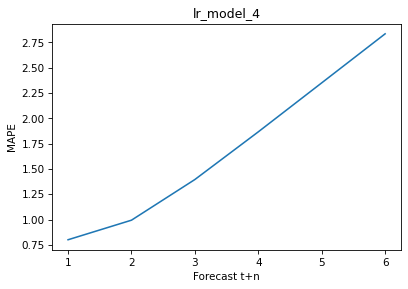

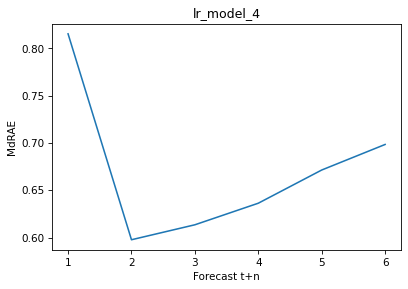

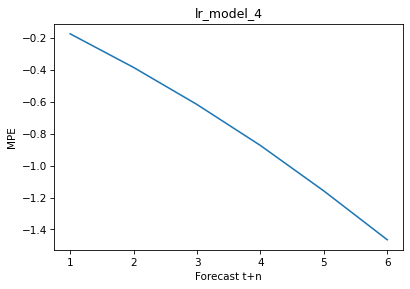

In [26]:
# Plot metrics over forecast period. View the output in Run History to view.
plot_metric('MAPE', performance_metrics_4, 'lr_model_4')
plot_metric('MdRAE', performance_metrics_4, 'lr_model_4')
plot_metric('MPE', performance_metrics_4, 'lr_model_4')

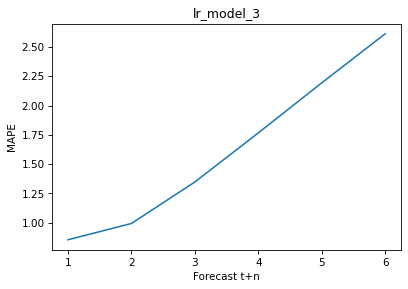

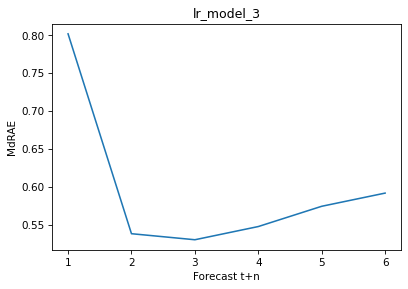

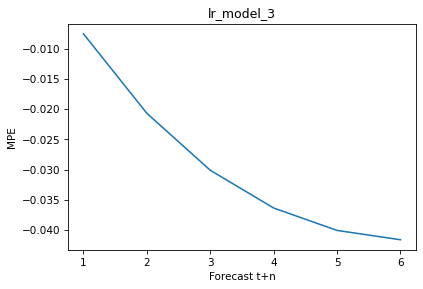

In [27]:
plot_metric('MAPE', performance_metrics_3, 'lr_model_3')
plot_metric('MdRAE', performance_metrics_3, 'lr_model_3')
plot_metric('MPE', performance_metrics_3, 'lr_model_3')

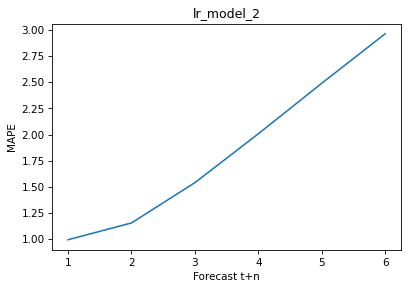

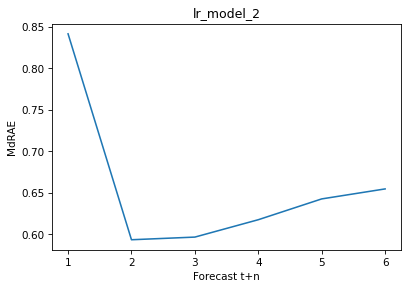

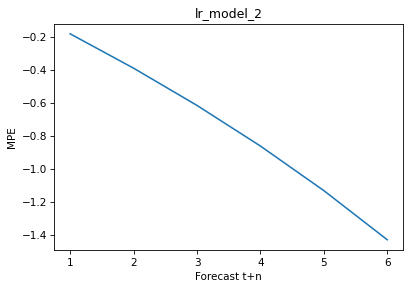

In [28]:
plot_metric('MAPE', performance_metrics_2, 'lr_model_2')
plot_metric('MdRAE', performance_metrics_2, 'lr_model_2')
plot_metric('MPE', performance_metrics_2, 'lr_model_2')

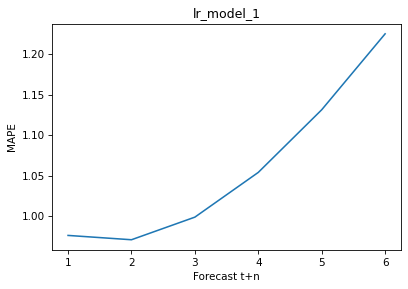

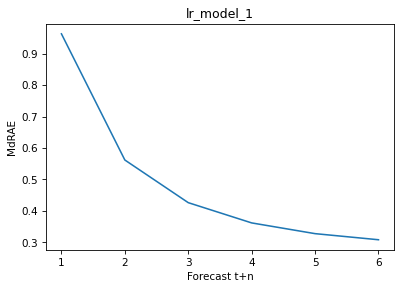

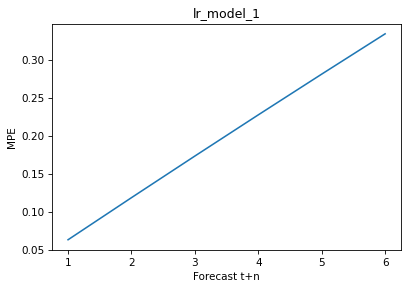

In [29]:
plot_metric('MAPE', performance_metrics_1, 'lr_model_1')
plot_metric('MdRAE', performance_metrics_1, 'lr_model_1')
plot_metric('MPE', performance_metrics_1, 'lr_model_1')

In [30]:
for n in range(1, 7):    
    predictions_df_4['error_t+'+str(n)] = predictions_df_4['pred_t+'+str(n)] - predictions_df_4['load_actuals_mw']
    predictions_df_4['abs_error_t+'+str(n)] = abs(predictions_df_4['error_t+'+str(n)])
    predictions_df_4['abs_pct_error_t+'+str(n)] = abs(predictions_df_4['error_t+'+str(n)]) / predictions_df_4['load_actuals_mw']

### Inspect forecast for a specified date range

Set date range for forecast inspection. The test dataset covers the date range 2016-07-01 to 2017-08-10.

In [31]:
min_date = '2021-03-01'
max_date = '2021-03-02'

The chart below shows the actual demand and forecasts over the specified period. Multiple forecasts for the same period are shown. For example, forecast $t+3$ represents the prediction made 3 hours before the period being forecasted.

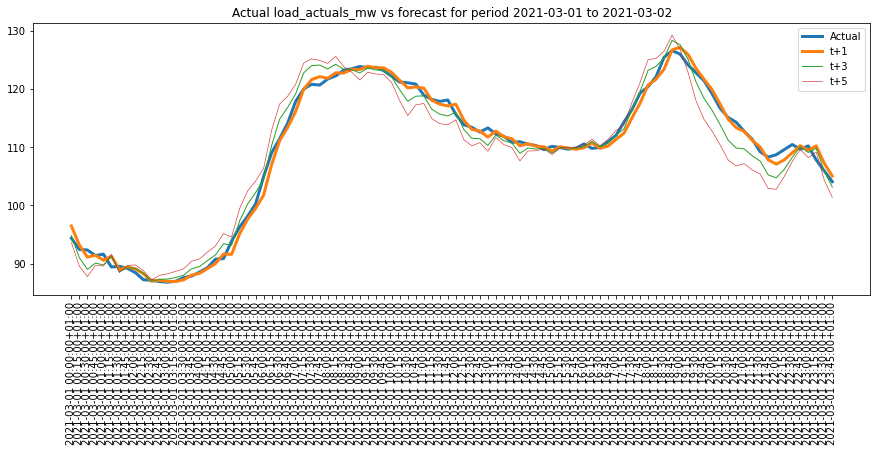

In [32]:
plot_df = predictions_df_4.loc[(predictions_df_4['timestamp']>=min_date) & (predictions_df_4['timestamp']<=max_date), ]
plt.figure(figsize=(15, 5))
plt.plot(plot_df['timestamp'], plot_df['load_actuals_mw'], linewidth=3, label='Actual')
for n in [1,3,5]:
    plt.plot(plot_df['timestamp'], plot_df['pred_t+'+str(n)], linewidth=3/n, label='t+'+str(n))
plt.xticks(rotation=90)
plt.title('Actual load_actuals_mw vs forecast for period ' + min_date + ' to ' + max_date)
plt.legend()
plt.show()

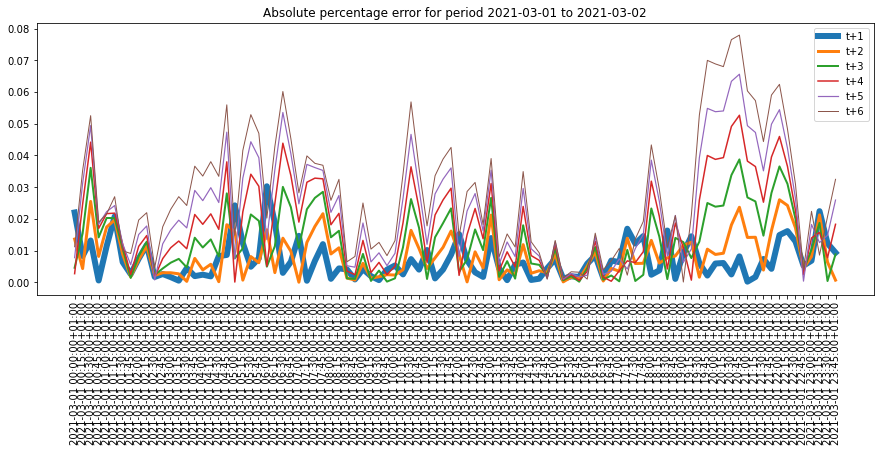

In [33]:
plt.figure(figsize=(15, 5))
for n in range(1,7,1):
    plt.plot(plot_df['timestamp'], plot_df['abs_pct_error_t+'+str(n)], linewidth=6/n, label='t+'+str(n))
plt.xticks(rotation=90)
plt.title('Absolute percentage error for period ' + min_date + ' to ' + max_date)
plt.legend()
plt.show()

Notice how the forecast error gets progressively worse the greater the time difference between the forecasted period and the time the forecast was produced. This is due to the recursive method used to generate the forecasts causing the accumulation of errors.

### Inspect forecast errors over entire test dataset

This should reveal whether forecast error increases as time progresses. This could indicate that the model needs to be retrained more frequently so that the model can learn from more recent patterns in energy demand.

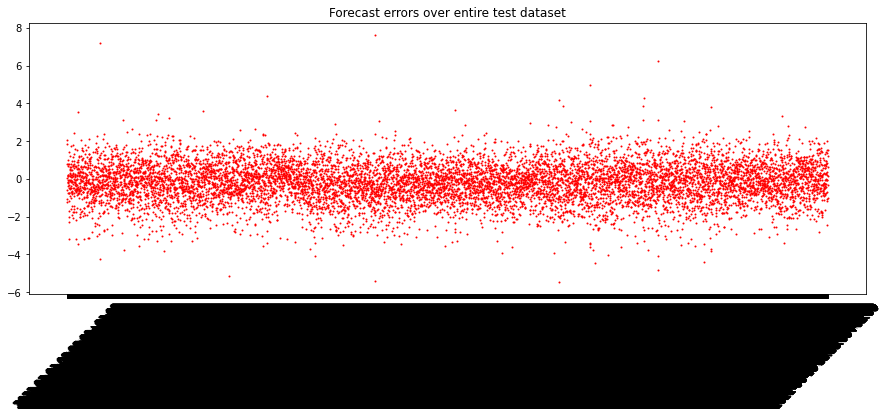

In [34]:
plt.figure(figsize=(15, 5))
plt.plot(predictions_df_4['timestamp'], predictions_df_4['error_t+1'], 'ro', markersize=1)
plt.title('Forecast errors over entire test dataset')
plt.xticks(rotation=45)
plt.show()